In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library


1. Kasus yang diambil
Dataset ini berisi tweet publik tentang vaksinasi COVID-19 yang diambil dari platform Twitter. Setiap baris merepresentasikan satu tweet, lengkap dengan informasi teks, waktu, pengguna, metadata akun, serta statistik engagement (seperti jumlah like dan retweet). Tujuan utama dataset ini adalah untuk menganalisis opini publik, persebaran informasi, dan persepsi masyarakat terhadap vaksin COVID-19 di berbagai wilayah dunia.

Jadi, kasus yang diambil: Analisis percakapan dan persepsi masyarakat di Twitter terkait vaksinasi COVID-19.

2. Penjelasan setiap kolom
Berikut daftar kolom dalam dataset dan penjelasan fungsinya:
|   Nama Kolom       | Tipe Data     | Penjelasan                                                                                                    |
| ------------------ | ------------- | ----------------------------------------------------------------------------------------------------------------- |
| `user_name`        | string        | Nama pengguna akun Twitter yang menulis tweet.                                                                    |
| `user_location`    | string        | Lokasi pengguna (jika dicantumkan di profil). Sering tidak konsisten, bisa nama kota, negara, atau kosong.        |
| `user_description` | string        | Deskripsi singkat dari profil pengguna.                                                                           |
| `user_created`     | datetime      | Tanggal akun pengguna dibuat di Twitter.                                                                          |
| `user_followers`   | integer       | Jumlah pengikut (followers) akun pengguna.                                                                        |
| `user_friends`     | integer       | Jumlah akun lain yang diikuti pengguna (following).                                                               |
| `user_favourites`  | integer       | Jumlah tweet yang disukai pengguna (favourites).                                                                  |
| `user_verified`    | boolean       | Status verifikasi akun (`True` jika akun terverifikasi).                                                          |
| `date`             | datetime      | Waktu dan tanggal tweet diposting.                                                                                |
| `text`             | string        | Isi utama tweet. Kolom ini yang digunakan untuk analisis teks seperti sentiment analysis atau topic modeling. |
| `hashtags`         | string/list   | Daftar tagar (#) yang disertakan di tweet.                                                                        |
| `source`           | string        | Aplikasi atau platform yang digunakan untuk mengirim tweet (misal: “Twitter for iPhone”, “Twitter Web App”).      |
| `retweets`         | integer       | Jumlah kali tweet tersebut di-retweet.                                                                            |
| `favorites`        | integer       | Jumlah likes atau “favourites” pada tweet tersebut.                                                               |
| `is_retweet`       | boolean       | Menunjukkan apakah tweet ini merupakan retweet (`True`) atau tweet asli (`False`).                        |
| `id`               | integer       | ID unik untuk setiap tweet.                                                                                       |

In [1]:
# 3. Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [2]:
# 4. Load data

df = pd.read_csv("vaccination_all_tweets.csv")
df.head()


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong


In [3]:
# 1. Jumlah baris data
df.shape

(228207, 16)

In [ ]:
# 2. Panjang rata-rata setiap baris


df['text_length'] = df['text'].astype(str).apply(len)

print("Rata-rata panjang teks (dalam karakter):", df['text_length'].mean())


df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

print("Rata-rata panjang teks (dalam kata):", df['word_count'].mean())


Rata-rata panjang teks (dalam karakter): 124.55553510628508
Rata-rata panjang teks (dalam kata): 16.828594214901383


In [5]:
# 3. Cek data duplikasi

duplicate_count = df.duplicated().sum()
print("Jumlah data duplikat:", duplicate_count)

Jumlah data duplikat: 0


In [ ]:
# 4. Cek data kosong


missing_values = df.isnull().sum()


missing_values = missing_values[missing_values > 0]

print("Jumlah data kosong tiap kolom:\n", missing_values)


Jumlah data kosong tiap kolom:
 user_name               2
user_location       66911
user_description    17023
hashtags            49703
source                119
dtype: int64


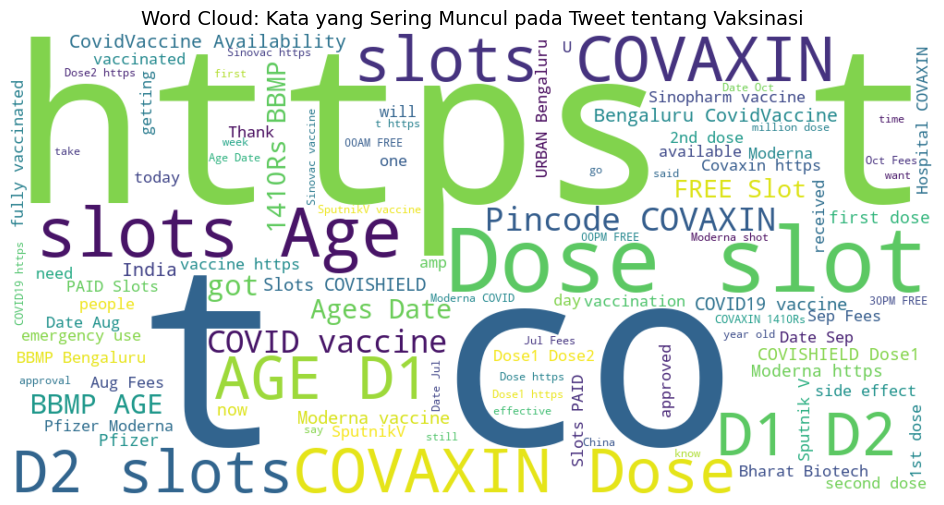

In [ ]:
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

from wordcloud import WordCloud, STOPWORDS

text_data = " ".join(df['text'].astype(str))


wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      stopwords=STOPWORDS, max_words=100).generate(text_data)


plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Kata yang Sering Muncul pada Tweet tentang Vaksinasi", fontsize=14)
plt.show()


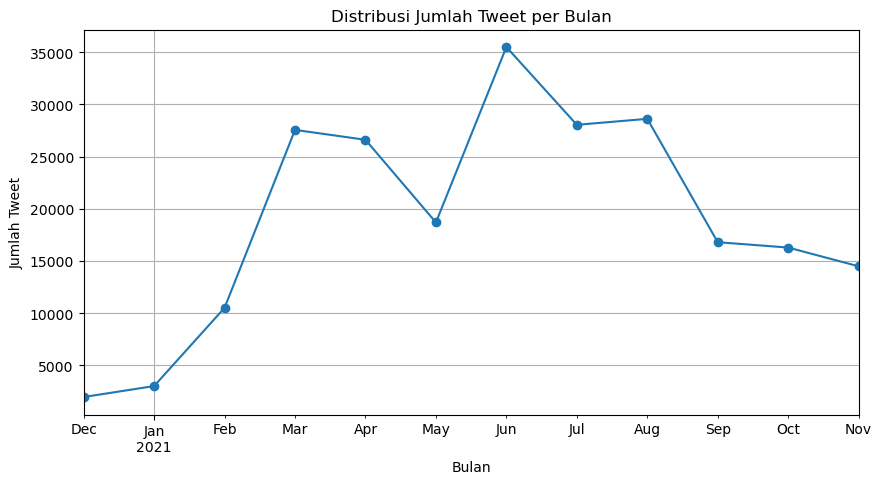

In [ ]:
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['month_year'] = df['date'].dt.to_period('M')


tweets_per_month = df['month_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
tweets_per_month.plot(kind='line', marker='o')
plt.title("Distribusi Jumlah Tweet per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Tweet")
plt.grid(True)
plt.show()


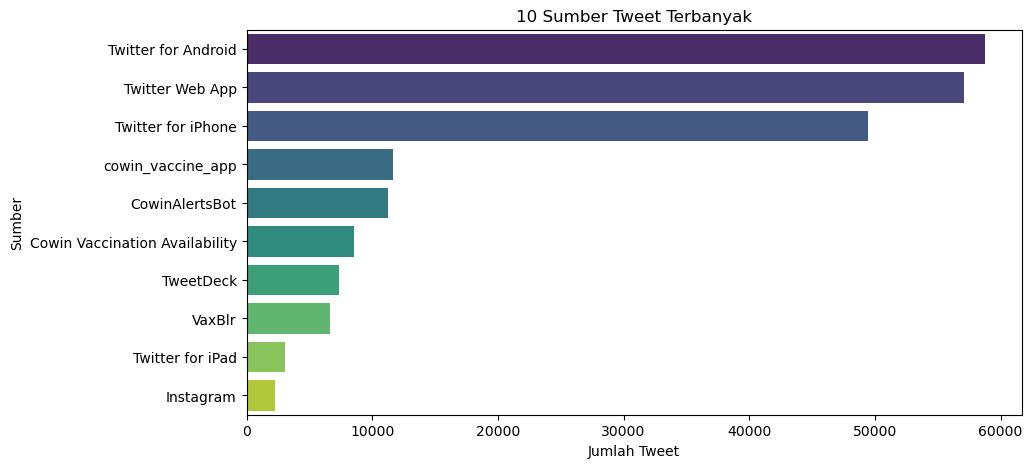

In [ ]:
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.


top_sources = df['source'].value_counts().head(10)


plt.figure(figsize=(10,5))
sns.barplot(x=top_sources.values, y=top_sources.index, palette="viridis")
plt.title("10 Sumber Tweet Terbanyak")
plt.xlabel("Jumlah Tweet")
plt.ylabel("Sumber")
plt.show()


In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)


In [ ]:
# 1. Tokenisasi

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


df['tokens'] = df['text'].astype(str).apply(word_tokenize)


df[['text', 'tokens']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,tokens
0,Same folks said daikon paste could treat a cyt...,"[Same, folks, said, daikon, paste, could, trea..."
1,While the world has been on the wrong side of ...,"[While, the, world, has, been, on, the, wrong,..."
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[#, coronavirus, #, SputnikV, #, AstraZeneca, ..."
3,"Facts are immutable, Senator, even when you're...","[Facts, are, immutable, ,, Senator, ,, even, w..."
4,Explain to me again why we need a vaccine @Bor...,"[Explain, to, me, again, why, we, need, a, vac..."


In [ ]:
# 2. Lemmatization

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


lemmatizer = WordNetLemmatizer()


df['lemmatized'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token.lower()) for token in tokens])


df[['text', 'tokens', 'lemmatized']].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,tokens,lemmatized
0,Same folks said daikon paste could treat a cyt...,"[Same, folks, said, daikon, paste, could, trea...","[same, folk, said, daikon, paste, could, treat..."
1,While the world has been on the wrong side of ...,"[While, the, world, has, been, on, the, wrong,...","[while, the, world, ha, been, on, the, wrong, ..."
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[#, coronavirus, #, SputnikV, #, AstraZeneca, ...","[#, coronavirus, #, sputnikv, #, astrazeneca, ..."
3,"Facts are immutable, Senator, even when you're...","[Facts, are, immutable, ,, Senator, ,, even, w...","[fact, are, immutable, ,, senator, ,, even, wh..."
4,Explain to me again why we need a vaccine @Bor...,"[Explain, to, me, again, why, we, need, a, vac...","[explain, to, me, again, why, we, need, a, vac..."


In [ ]:
# 3. Stemming

from nltk.stem import PorterStemmer


stemmer = PorterStemmer()


df['stemmed'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token.lower()) for token in tokens])


df[['text', 'tokens', 'stemmed']].head()


,text,tokens,stemmed
0,Same folks said daikon paste could treat a cyt...,"[Same, folks, said, daikon, paste, could, trea...","[same, folk, said, daikon, past, could, treat,..."
1,While the world has been on the wrong side of ...,"[While, the, world, has, been, on, the, wrong,...","[while, the, world, ha, been, on, the, wrong, ..."
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[#, coronavirus, #, SputnikV, #, AstraZeneca, ...","[#, coronaviru, #, sputnikv, #, astrazeneca, #..."
3,"Facts are immutable, Senator, even when you're...","[Facts, are, immutable, ,, Senator, ,, even, w...","[fact, are, immut, ,, senat, ,, even, when, yo..."
4,Explain to me again why we need a vaccine @Bor...,"[Explain, to, me, again, why, we, need, a, vac...","[explain, to, me, again, whi, we, need, a, vac..."


In [ ]:
# 4. Stopword removal (Tanda baca, angka dan kata)

import nltk
from nltk.corpus import stopwords
import string
import re

nltk.download('stopwords')


stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = text.lower()                                     # ubah ke huruf kecil
    text = re.sub(r'\d+', '', text)                         # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    tokens = word_tokenize(text)                            # tokenisasi
    tokens = [word for word in tokens if word not in stop_words]      # hapus stopwords
    tokens = [word for word in tokens if len(word) > 2]               # hapus kata sangat pendek (misal “a”, “to”)
    return tokens


df['clean_tokens'] = df['text'].astype(str).apply(clean_text)


df[['text', 'clean_tokens']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_tokens
0,Same folks said daikon paste could treat a cyt...,"[folks, said, daikon, paste, could, treat, cyt..."
1,While the world has been on the wrong side of ...,"[world, wrong, side, history, year, hopefully,..."
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[coronavirus, sputnikv, astrazeneca, pfizerbio..."
3,"Facts are immutable, Senator, even when you're...","[facts, immutable, senator, even, youre, ethic..."
4,Explain to me again why we need a vaccine @Bor...,"[explain, need, vaccine, borisjohnson, matthan..."


In [ ]:
# 5. Text Normalisasi

import re


normalization_dict = {
    "u": "you",
    "ur": "your",
    "pls": "please",
    "plz": "please",
    "im": "i am",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "gonna": "going to",
    "gotta": "got to",
    "wanna": "want to",
    "bcoz": "because",
    "covid19": "covid",
    "vax": "vaccine",
    "vacc": "vaccine",
    "coz": "because"
}

def normalize_tokens(tokens):
    normalized = []
    for token in tokens:
        token = token.lower()                       
        token = re.sub(r'(.)\1{2,}', r'\1', token)  
        if token in normalization_dict:             
            token = normalization_dict[token]
        normalized.append(token)
    return normalized

df['normalized'] = df['clean_tokens'].apply(normalize_tokens)


df[['clean_tokens', 'normalized']].head()


,clean_tokens,normalized
0,"[folks, said, daikon, paste, could, treat, cyt...","[folks, said, daikon, paste, could, treat, cyt..."
1,"[world, wrong, side, history, year, hopefully,...","[world, wrong, side, history, year, hopefully,..."
2,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronavirus, sputnikv, astrazeneca, pfizerbio..."
3,"[facts, immutable, senator, even, youre, ethic...","[facts, immutable, senator, even, youre, ethic..."
4,"[explain, need, vaccine, borisjohnson, matthan...","[explain, need, vaccine, borisjohnson, matthan..."


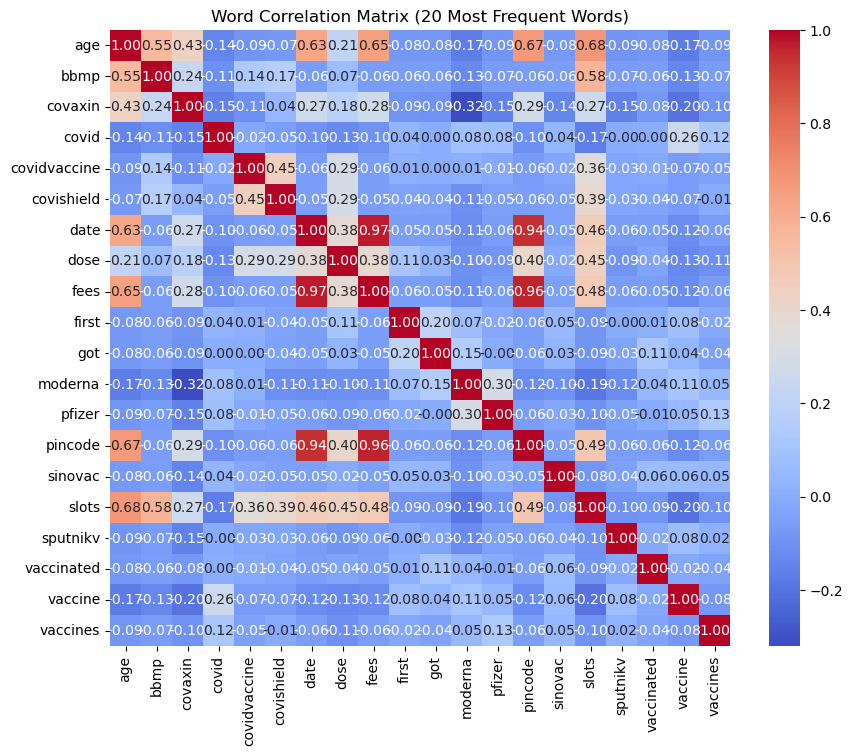

In [ ]:
# 6. Matrix correlation (opsional)

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['normalized_text'] = df['normalized'].apply(lambda x: ' '.join(x))


vectorizer = CountVectorizer(max_features=20) 
X = vectorizer.fit_transform(df['normalized_text'])

word_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


corr_matrix = word_matrix.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Word Correlation Matrix (20 Most Frequent Words)")
plt.show()


In [ ]:
# 7. Text Vektorisasi

from sklearn.feature_extraction.text import CountVectorizer


df['final_text'] = df['normalized'].apply(lambda x: ' '.join(x))


count_vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
X_count = count_vectorizer.fit_transform(df['final_text'])


print("Shape of Count Matrix:", X_count.shape)


Shape of Count Matrix: (228207, 11356)


In [ ]:
# Berikan Penjelasan tentang model yang dipilih

LDA merupakan metode unsupervised learning yang berfungsi mengidentifikasi tema tersembunyi dalam kumpulan teks tanpa memerlukan label data.
Secara konsep, LDA mengasumsikan bahwa setiap dokumen merupakan campuran dari beberapa topik, dan setiap topik tersusun dari sekumpulan kata yang sering muncul bersama.
Misalnya, topik tentang vaksin COVID-19 mungkin berisi kata seperti vaccine, covid, dan pfizer, sementara topik lain tentang efek samping mencakup kata fever dan reaction.
Model ini bekerja dengan menghitung probabilitas kemunculan kata dalam topik serta distribusi topik dalam dokumen, hingga pola hubungan antara keduanya menjadi stabil.
Hasil akhirnya berupa daftar topik yang ditemukan beserta kata-kata yang paling mewakilinya.
Pemilihan LDA didasarkan pada beberapa alasan yaitu model ini tidak memerlukan label data, mampu mengungkap pola tematik secara otomatis, dan hasilnya mudah diinterpretasikan.
Selain itu, LDA juga merupakan model yang banyak digunakan dalam penelitian NLP, terutama untuk analisis teks media sosial.
Secara keseluruhan, LDA dipilih karena kemampuannya dalam menemukan dan menggambarkan struktur topik tersembunyi dalam kumpulan tweet terkait vaksinasi, sehingga dapat membantu memahami pola pembahasan publik secara lebih mendalam.

In [ ]:
Setelah model Latent Dirichlet Allocation (LDA) dijalankan, tahap berikutnya adalah melakukan visualisasi hasil topik agar pola yang muncul dapat dipahami dengan lebih mudah.
Visualisasi ini bertujuan untuk menunjukkan topik-topik utama yang ditemukan model beserta kata-kata yang paling berpengaruh pada setiap topik.
Hasil dari model divisualisasikan melalui beberapa cara, diantaranya :
1.	Tabel Ringkasan Topik, yang menampilkan daftar topik beserta 10 kata dengan bobot tertinggi (kata yang paling merepresentasikan topik tersebut). Dari tabel ini, peneliti dapat mengenali pola tema seperti “vaksin dan kesehatan”, “efek samping”, atau “kebijakan pemerintah”.
2.	Bar Chart Frekuensi Kata, digunakan untuk menggambarkan seberapa dominan setiap kata muncul dalam topik tertentu. Visualisasi ini membantu memahami kata apa yang paling sering muncul dan bagaimana distribusinya antar topik.
3.	Word Cloud, yang menampilkan kata-kata penting dalam ukuran berbeda sesuai tingkat kemunculannya. Semakin besar ukuran suatu kata, semakin kuat relevansinya dengan topik yang bersangkutan. Visualisasi ini berguna untuk memberikan gambaran intuitif dan cepat mengenai isi dari masing-masing topik.
Melalui kombinasi berbagai bentuk visualisasi tersebut, hasil analisis topik menjadi lebih interpretatif dan mudah dipahami, baik dari sisi kata kunci maupun konteks tematik yang muncul di dalam data tweet mengenai vaksinasi.



In [ ]:



import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


df = pd.read_csv("vaccination_all_tweets.csv")



try:
    text_data = df["final_text"]
except:
    text_data = df["text"]


cv = CountVectorizer()
X = cv.fit_transform(text_data)


lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(X)

print("✅ Model dan vectorizer berhasil direload")


✅ Model dan vectorizer berhasil direload



Topik 1:
['covid', 'for', 'to', 'in', 'vaccine', 'the', 'of', 'covaxin', 'https', 'co']

Topik 2:
['for', 'vaccine', 'is', 'and', 'of', 'to', 'moderna', 'the', 'https', 'co']

Topik 3:
['bbmp', 'dose', 'at', 'age', 'https', 'co', '18', '2021', 'slots', 'covaxin']

Tabel Topik dan Kata Kunci:


,Topik,Kata Kunci
0,Topik 1,"covid, for, to, in, vaccine, the, of, covaxin,..."
1,Topik 2,"for, vaccine, is, and, of, to, moderna, the, h..."
2,Topik 3,"bbmp, dose, at, age, https, co, 18, 2021, slot..."


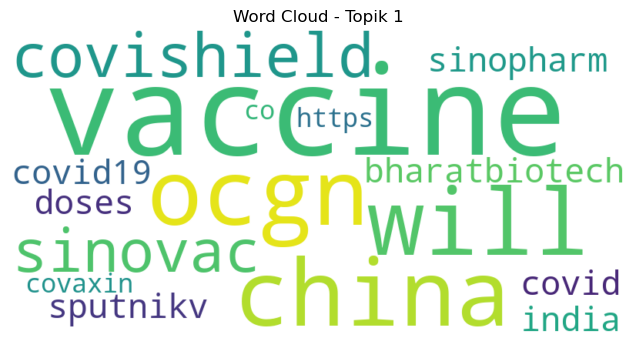

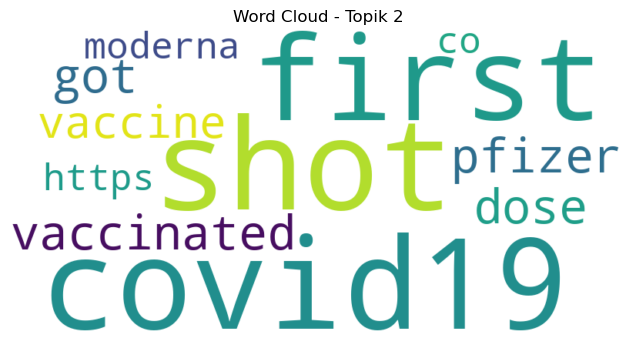

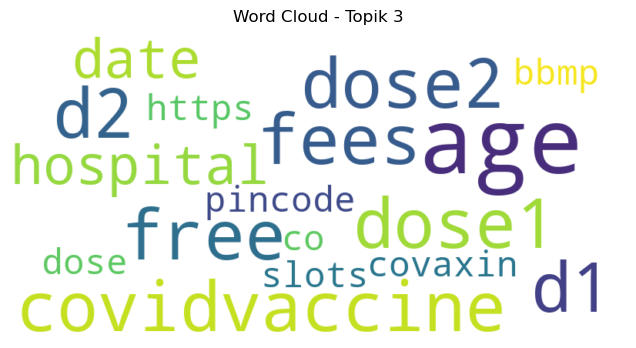

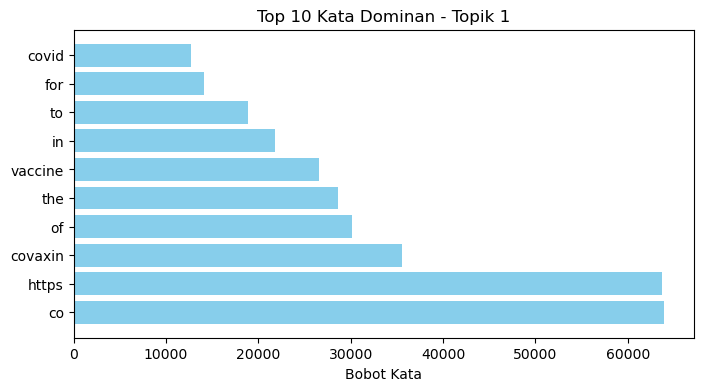

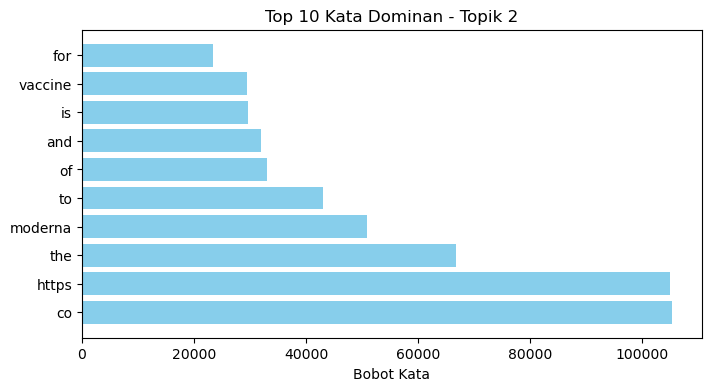

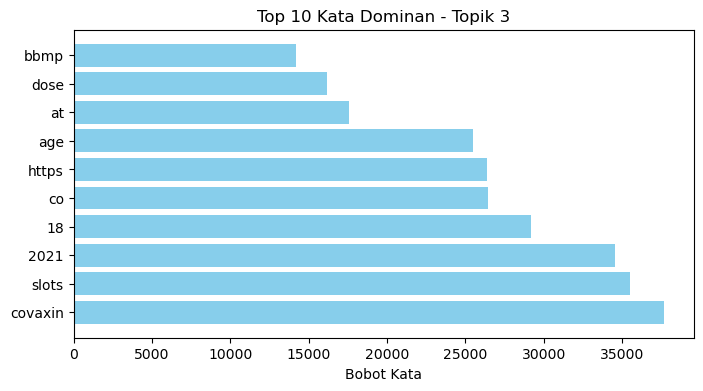

In [ ]:

for idx, topic in enumerate(lda_model.components_):
    print(f"\nTopik {idx+1}:")
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


import pandas as pd

topics = []
for idx, topic in enumerate(lda_model.components_):
    words = [cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    topics.append({"Topik": f"Topik {idx+1}", "Kata Kunci": ", ".join(words)})

df_topics = pd.DataFrame(topics)
print("\nTabel Topik dan Kata Kunci:")
display(df_topics)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

for idx, topic in enumerate(lda_model.components_):
    plt.figure(figsize=(8, 4))
    topic_words = " ".join([cv.get_feature_names_out()[i] for i in topic.argsort()[-30:]])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - Topik {idx+1}")
    plt.show()


import numpy as np

for idx, topic in enumerate(lda_model.components_):
    plt.figure(figsize=(8, 4))
    top_features_ind = topic.argsort()[-10:]
    top_features = [cv.get_feature_names_out()[i] for i in top_features_ind]
    weights = topic[top_features_ind]
    
    plt.barh(top_features, weights, color='skyblue')
    plt.xlabel("Bobot Kata")
    plt.title(f"Top 10 Kata Dominan - Topik {idx+1}")
    plt.gca().invert_yaxis()
    plt.show()


In [ ]:
Setelah model LDA menghasilkan distribusi topik untuk setiap dokumen, tahap selanjutnya adalah visualisasi lanjutan untuk melihat hubungan antar dokumen berdasarkan kesamaan topiknya.
Teknik yang digunakan pada tahap ini adalah PCA (Principal Component Analysis) atau t-SNE (t-distributed Stochastic Neighbor Embedding).
Kedua metode ini berfungsi untuk mereduksi dimensi data menjadi dua dimensi agar dapat divisualisasikan dalam bentuk scatter plot.
Setiap titik pada plot mewakili satu dokumen (tweet), dan jarak antar titik menunjukkan tingkat kemiripan topik — dokumen dengan topik serupa akan berdekatan, sedangkan yang berbeda akan lebih berjauhan.
Secara umum, PCA lebih efisien untuk melihat pola global data, sedangkan t-SNE lebih baik dalam menampilkan kelompok kecil (klaster) dengan topik yang mirip.
Dengan visualisasi ini, kita dapat menilai apakah hasil LDA sudah membentuk pemisahan topik yang jelas atau masih ada tumpang tindih antar topik.
Melalui penerapan PCA atau t-SNE, hasil analisis topik menjadi lebih mudah dipahami karena memberikan gambaran visual yang intuitif tentang bagaimana topik-topik tersebar di dalam data.

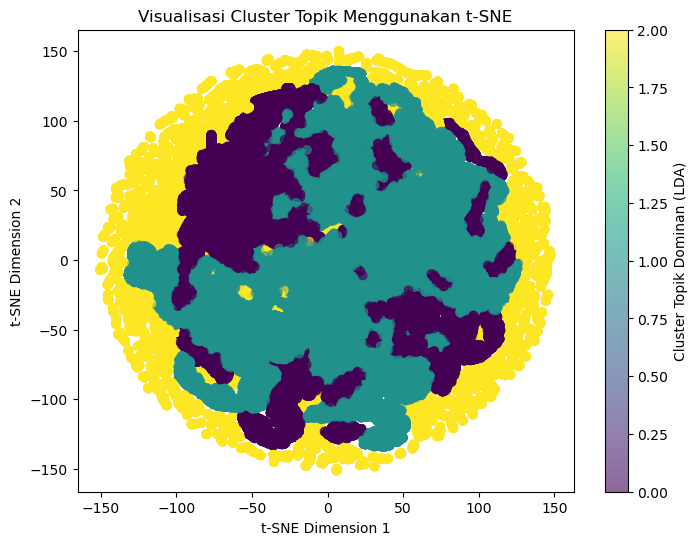

In [ ]:
 



from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


lda_output = lda_model.transform(X)


tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    init='random',
    random_state=42
)

tsne_result = tsne.fit_transform(lda_output)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    tsne_result[:, 0],
    tsne_result[:, 1],
    c=lda_output.argmax(axis=1),   
    alpha=0.6
)

plt.title("Visualisasi Cluster Topik Menggunakan t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(scatter, label="Cluster Topik Dominan (LDA)")
plt.show()


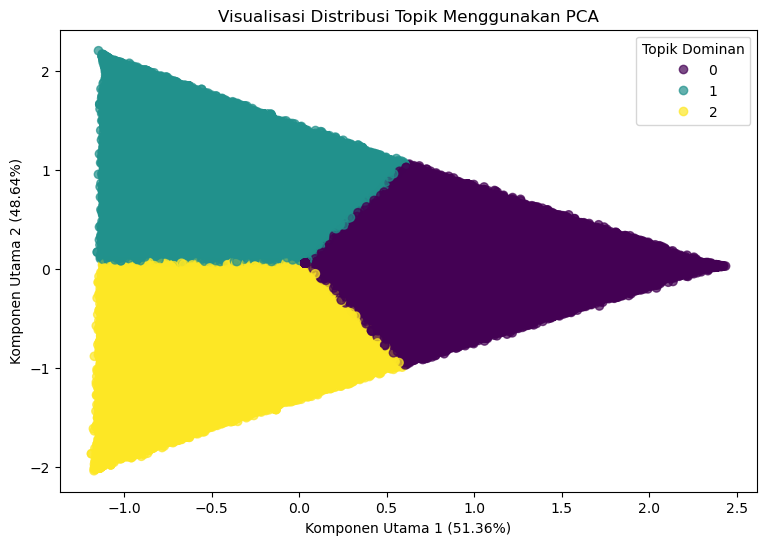

In [ ]:




import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import re






df = df[['text']].dropna()   





def clean_text(text):
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"[^a-zA-Z ]", "", text)
    text = text.lower()
    return text

df['clean_text'] = df['text'].apply(clean_text)





vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  
X = vectorizer.fit_transform(df['clean_text'])





lda_model = LatentDirichletAllocation(
    n_components=3,   
    random_state=42
)
lda_output = lda_model.fit_transform(X)   






scaler = StandardScaler()
lda_scaled = scaler.fit_transform(lda_output)  

pca = PCA(n_components=2)
pca_result = pca.fit_transform(lda_scaled)




plt.figure(figsize=(9, 6))
scatter = plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=lda_output.argmax(axis=1),
    alpha=0.7
)

plt.title("Visualisasi Distribusi Topik Menggunakan PCA")
plt.xlabel(f"Komponen Utama 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")  
plt.ylabel(f"Komponen Utama 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.legend(*scatter.legend_elements(), title="Topik Dominan")
plt.show()
